In [2]:
from AutoGraphing import *

In [4]:
cl = neighborcolor('#9cc3e5', 5)

['#9cc3e5', '#cc9ce5', '#e59ca5', '#e0e59c', '#9ce5af']

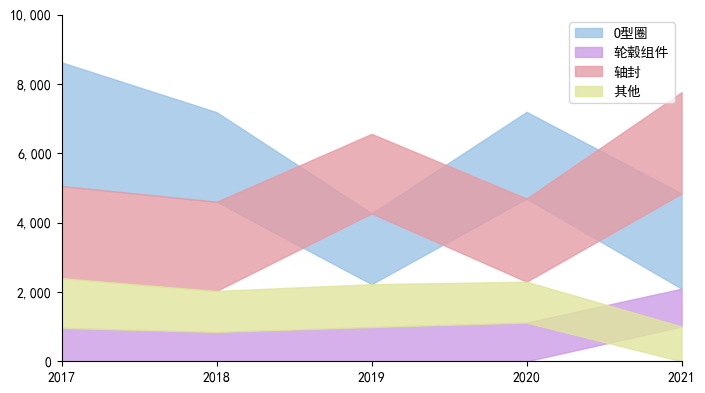

In [5]:
pgp = {
    'O型圈': [35714420.23, 25857196.68, 20436590.34, 25020741.2, 27462153.69],
    '轮毂组件': [9618678.81, 8449662.09, 9872174.15, 11172112.59, 10917939.59],
    '轴封': [26519768.26, 25727904.92, 22952542.67, 23996849.77, 29261376.04],
    '其他': [14420919.65, 11863221.33, 12375414.42, 11795274.87, 10032247.61]
}
pgp = pd.DataFrame(pgp)
tpgp = pgp.T
#——————————————————————————————————————————————————————————————————————————————————————#
x = arange(2017, 2022).tolist()
strx = []
for i in x:
    strx.append(str(i))
#——————————————————————————————————————————————————————————————————————————————————————#
thelist = []
for col in pgp:
    thelist.append([[], [], col])
    for i in range(len(pgp)):
        gp = pgp.loc[i:i, col].values[0]  # 当年的净利润
        base = tpgp[(tpgp[i]<gp)&(tpgp[i]>0)].sum()[i]
        top = base + gp
        thelist[-1][0].append(base)
        thelist[-1][1].append(top)
#——————————————————————————————————————————————————————————————————————————————————————#
fig, ax = plt.subplots(figsize=(8, 4.5))

for i in range(len(thelist)):
    ax.fill_between(strx, thelist[i][0], thelist[i][1], label=thelist[i][2], alpha=0.8, color=cl[i])

ax.set_xmargin(0)
plt.legend()
ax.set_ylim(0)
FormatTicks(ax, unit=1e4)